In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

## load the data

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# reading data
data = pd.read_csv("cash-crops-nepal.csv")
print(data.shape)
# visualize some data
print(data.iloc[:3,:])

X = data[['Area','Production','Yield']].values
le.fit(data['Crop'].values.tolist())
y = le.transform(data['Crop'].values.tolist())
target_names = list(data['Crop'].unique())
#target_names = ['OILSEED','POTATO']
print(X[0])
print(y)
print(data['Crop'].unique())

(105, 6)
   Year AD  Year BS     Crop    Area  Production  Yield
0  1984/85  2041/42  OILSEED  127820       84030    657
1  1985/86  2042/43  OILSEED  137920       78390    568
2  1986/87  2043/44  OILSEED  142890       82500    577
[127820  84030    657]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


# PCA to visualize digits

Dimensionality reduction derives a set of new artificial features smaller than the original feature set. Here we’ll use Principal Component Analysis (PCA), a dimensionality reduction that strives to retain most of the variance of the original data. We’ll use sklearn.decomposition.PCA on the iris dataset:

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True)
pca.fit(X) 

PCA(n_components=3, whiten=True)

In [40]:
pca.explained_variance_ratio_

array([9.91550410e-01, 8.38685233e-03, 6.27377757e-05])

In [41]:
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)
X_pca.shape

(105, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [42]:
X_pca.mean(axis=0)

array([-7.40148683e-18, -7.29575130e-17])

In [43]:
X_pca.std(axis=0, ddof=1)

array([1., 1.])

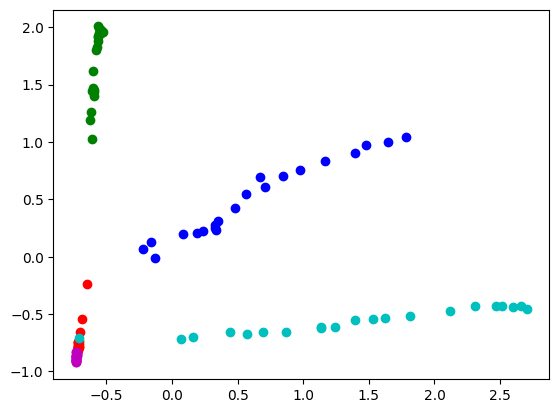

In [44]:
target_ids = range(len(target_names))
colors = 'r','g','b','c','m','y','k','gray'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=label)


# tSNE to visualize digits


Here we use :class:`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.




Load the iris data (again)


Fit and transform with a TSNE



In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

Project the data in 2D



In [46]:
X_2d = tsne.fit_transform(X)

Visualize the data



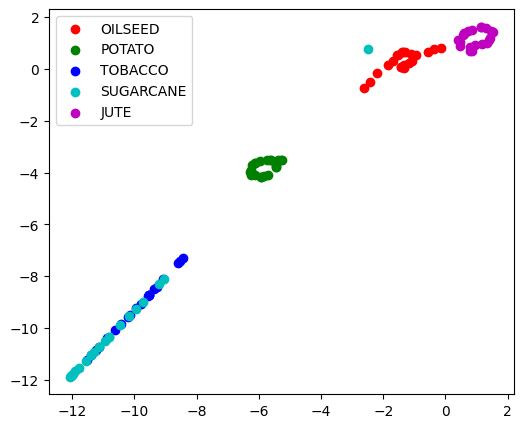

In [47]:
target_ids = range(len(target_names))
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'gray', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

NOTE: In general t-SNE turn to be a quite useful to visualization of high dimension data!!!